In [423]:
setwd("/frazer01/projects/CARDIPS/analysis/cardiac_eqtls")

source("script/packages.R"  )
source("script/input_data.R")
source("script/functions.R" )


# Find the right number of PEER factors to run eQTLs

In [424]:
totest = list.dirs(path = "pipeline/3.2.eqtls//eqtls_by_gene", full.names = FALSE, recursive = FALSE)
totest = totest[grepl("test_peer", totest) == TRUE]



In [431]:
totest

[1] "test_peer.10.gene"  "test_peer.100.gene" "test_peer.120.gene"
 [4] "test_peer.140.gene" "test_peer.160.gene" "test_peer.180.gene"
 [7] "test_peer.20.gene"  "test_peer.200.gene" "test_peer.220.gene"
[10] "test_peer.240.gene" "test_peer.260.gene" "test_peer.270.gene"
[13] "test_peer.275.gene" "test_peer.280.gene" "test_peer.285.gene"
[16] "test_peer.290.gene" "test_peer.300.gene" "test_peer.40.gene" 
[19] "test_peer.5.gene"   "test_peer.60.gene"  "test_peer.80.gene"

In [425]:
geneinfo = fread("pipeline/1.2.expression/gene_info.txt"   , sep = "\t", header = TRUE , data.table = FALSE)
isoinfo  = fread("pipeline/1.2.expression/isoform_info.txt", sep = "\t", header = TRUE , data.table = FALSE)


In [426]:
qtl_list        = lapply(totest, function(folder){merge_qtls(folder, geneinfo)})
names(qtl_list) = totest

In [427]:
peer2qtl = as.data.frame(rbindlist(lapply(totest, function(folder)
{
    x   = qtl_list[[folder]]
    out = data.frame(peer         = as.numeric(unlist(strsplit(folder, "\\."))[[2]]),
                     tested_genes = length(unique(x$transcript_id))
                    )
    
    for(type in 0:5)
    {
        out[,paste("type", type, sep = "_")] = nrow(x[x$egene == TRUE & x$type == type,])
    }
    
    return(out)
})), stringsAsFactors = FALSE)

peer2qtl = peer2qtl[order(peer2qtl$peer),]

In [428]:
peer2qtl$egenes = peer2qtl$type_0 / peer2qtl$tested_genes * 100
peer2qtl$top    = FALSE
peer2qtl$color  = "#cccccc"
peer2qtl$cex    = 1

peer2qtl[which.max(peer2qtl$egenes), "top"  ] = TRUE
peer2qtl[which.max(peer2qtl$egenes), "color"] = "#ff0000"
peer2qtl[which.max(peer2qtl$egenes), "cex"  ] = 2

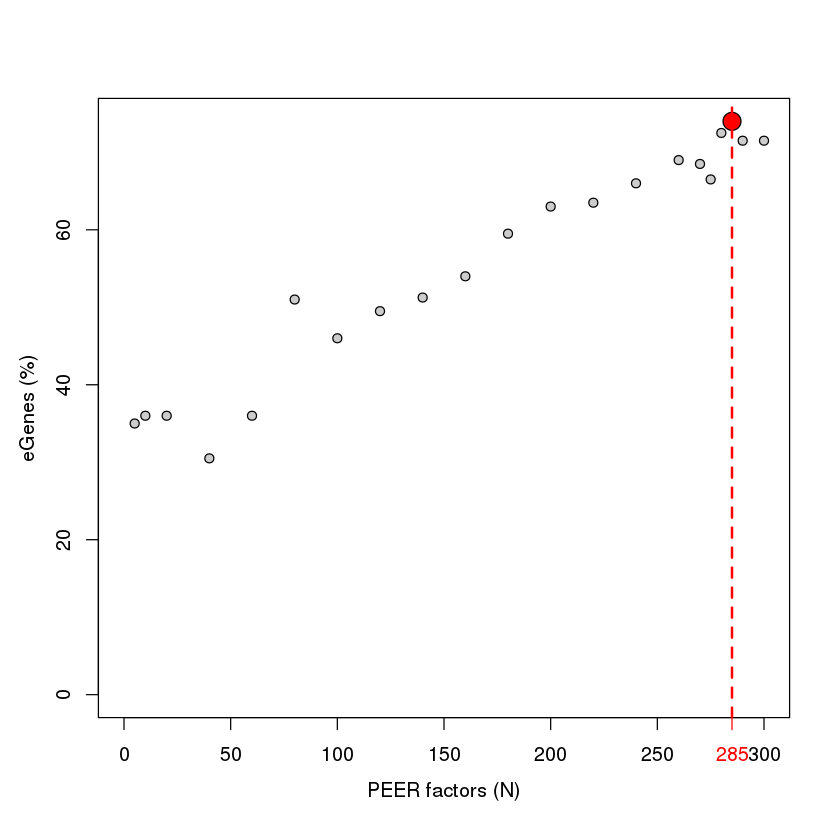

In [429]:
plot(peer2qtl$peer, peer2qtl$egenes, xlim = c(0,max(peer2qtl$peer)), ylim = c(0, max(peer2qtl$egenes)), pch = 21, cex = peer2qtl$cex, col = "#000000", bg = peer2qtl$color, xlab = "", ylab = "")

mtext(text = "eGenes (%)"      , side = 2, line = 2.5)
mtext(text = "PEER factors (N)", side = 1, line = 2.5)

abline(v = peer2qtl[peer2qtl$top == TRUE, "peer"], lty = "dashed", col = "#ff0000", lwd = 2)

axis(1, at = peer2qtl[peer2qtl$top == TRUE, "peer"], col = "#ff0000", col.axis = "#ff0000")

In [430]:
peer2qtl

,peer,tested_genes,type_0,type_1,type_2,type_3,type_4,type_5,egenes,top,color,cex
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<lgl>,<chr>,<dbl>
19,5,200,70,14,2,0,0,0,35.00000,FALSE,#cccccc,1
1,10,200,72,15,0,0,0,0,36.00000,FALSE,#cccccc,1
7,20,200,72,20,3,0,0,0,36.00000,FALSE,#cccccc,1
18,40,200,61,9,1,0,0,0,30.50000,FALSE,#cccccc,1
20,60,200,72,18,0,0,0,0,36.00000,FALSE,#cccccc,1
21,80,200,102,26,7,3,0,0,51.00000,FALSE,#cccccc,1
2,100,200,92,36,4,2,0,0,46.00000,FALSE,#cccccc,1
3,120,200,99,28,2,2,0,0,49.50000,FALSE,#cccccc,1
4,140,199,102,29,8,0,0,0,51.25628,FALSE,#cccccc,1
